# EXPLORATORY DATA ANALYSIS

# Import Essential Python Libraries

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Setup : Import the Dataset

We will use the data stored in `cleaned-alzheimers-dataset.csv` created at the end of `Data Extraction and Cleaning`

In [5]:
alzheimersdata = pd.read_csv('cleaned-alzheimers-dataset.csv',index_col= 0)
alzheimersdata

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...
368,M,82,16.0,1.0,28.0,0.5,1693,0.694,1.037
369,M,86,16.0,1.0,26.0,0.5,1688,0.675,1.040
370,F,61,13.0,2.0,30.0,0.0,1319,0.801,1.331
371,F,63,13.0,2.0,30.0,0.0,1327,0.796,1.323


# Response Variable

Let us start by exploring the response variable `CDR`, the one we are supposed to predict at the end of the day.

In [6]:
cdr_mapping = {
    0: 'Normal',
    0.5: 'Very Mild',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe'
}

# Map the numeric values of CDR to corresponding words
alzheimersdata['CDR'] = alzheimersdata['CDR'].map(cdr_mapping)


# Print the updated DataFrame
print(alzheimersdata.head())

  M/F  Age  Educ  SES  MMSE        CDR  eTIV   nWBV    ASF
0   F   74   2.0  3.0  29.0     Normal  1344  0.743  1.306
1   F   55   4.0  1.0  29.0     Normal  1147  0.810  1.531
2   F   73   4.0  3.0  27.0  Very Mild  1454  0.708  1.207
8   M   74   5.0  2.0  30.0     Normal  1636  0.689  1.073
9   F   52   3.0  2.0  30.0     Normal  1321  0.827  1.329


/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


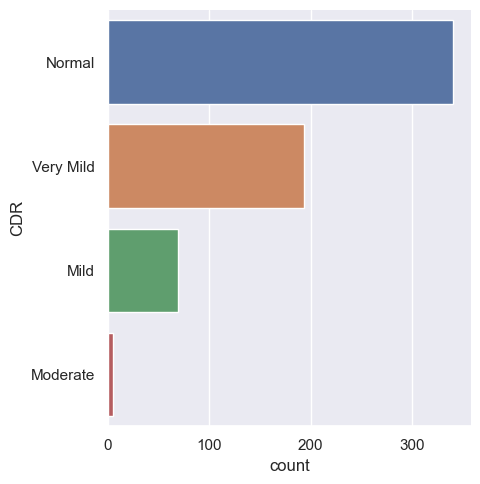

In [7]:
sb.catplot(y = 'CDR', data = alzheimersdata, kind = "count")

In [8]:
countNormal, countVeryMild, countMild, countModerate = alzheimersdata['CDR'].value_counts()
print("Ratio of classes is Normal : Very Mild: Mild: Moderate = ", countNormal, ":", countVeryMild, ":", countMild, ":", countModerate)

Ratio of classes is Normal : Very Mild: Mild: Moderate =  341 : 193 : 69 : 5


Let us explore the other clinical info variable `MMSE`

In [9]:
import pandas as pd

# Assuming you have a DataFrame named 'alzheimersdata' containing the 'MMSE' column
# If not, replace 'alzheimersdata' with the actual name of your DataFrame

# Convert 'MMSE' column to numeric type (assuming it contains numeric values)
alzheimersdata['MMSE'] = pd.to_numeric(alzheimersdata['MMSE'], errors='coerce')

# Round 'MMSE' values to remove decimal places
alzheimersdata['MMSE'] = alzheimersdata['MMSE'].round(0)

# Define custom ranges for MMSE categories
ranges = [[0, 9], [10, 18], [19, 23], [24, 30]]
categories = ['Severe Cognitive Impairment', 
              'Moderate Cognitive Impairment', 
              'Mild Cognitive Impairment', 
              'Normal']

# Define a function to map numerical values of MMSE to categories
def map_mmse_category(mmse_value):
    for i, (range_start, range_end) in enumerate(ranges):
        if range_start <= mmse_value <= range_end:
            return categories[i]
    return None

# Apply the mapping function to the 'MMSE' column
alzheimersdata['MMSE'] = alzheimersdata['MMSE'].apply(map_mmse_category)

# Print the updated DataFrame
print(alzheimersdata.head())


  M/F  Age  Educ  SES    MMSE        CDR  eTIV   nWBV    ASF
0   F   74   2.0  3.0  Normal     Normal  1344  0.743  1.306
1   F   55   4.0  1.0  Normal     Normal  1147  0.810  1.531
2   F   73   4.0  3.0  Normal  Very Mild  1454  0.708  1.207
8   M   74   5.0  2.0  Normal     Normal  1636  0.689  1.073
9   F   52   3.0  2.0  Normal     Normal  1321  0.827  1.329


In [10]:
alzheimersdata

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,74,2.0,3.0,Normal,Normal,1344,0.743,1.306
1,F,55,4.0,1.0,Normal,Normal,1147,0.810,1.531
2,F,73,4.0,3.0,Normal,Very Mild,1454,0.708,1.207
8,M,74,5.0,2.0,Normal,Normal,1636,0.689,1.073
9,F,52,3.0,2.0,Normal,Normal,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...
368,M,82,16.0,1.0,Normal,Very Mild,1693,0.694,1.037
369,M,86,16.0,1.0,Normal,Very Mild,1688,0.675,1.040
370,F,61,13.0,2.0,Normal,Normal,1319,0.801,1.331
371,F,63,13.0,2.0,Normal,Normal,1327,0.796,1.323


/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


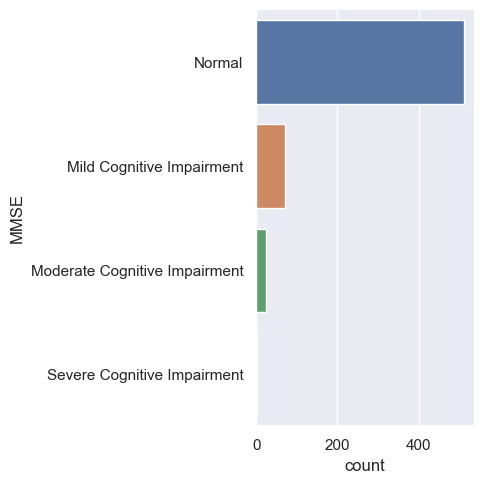

In [11]:
#ITSCHLOECHLOE
sb.catplot(y = "MMSE", data = alzheimersdata, kind = "count")

<Axes: xlabel='MMSE', ylabel='CDR'>

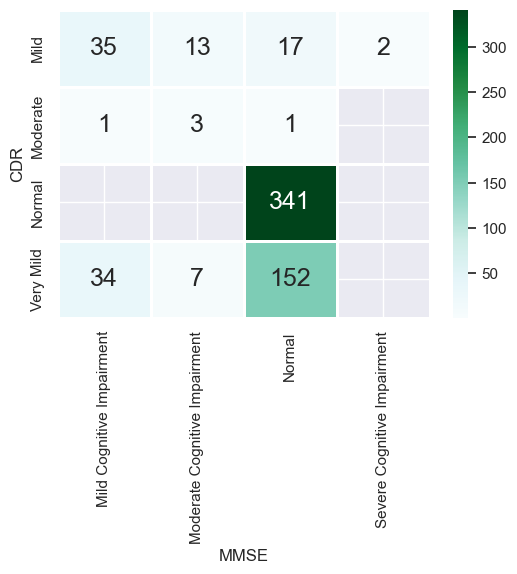

In [12]:
#CDR vs MMSE
f = plt.figure(figsize=(6, 4))
sb.heatmap(alzheimersdata.groupby(['CDR', 'MMSE']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

# Predictor Variables

### NUMERIC PREDICTORS

In [13]:
#ITSCHLOECHLOE
# Extract only the numeric data variables
numericData = pd.DataFrame(alzheimersdata[["Age", "eTIV", "nWBV", "ASF"]])

# Summary Statistics for all Variables
numericData.describe().round(2)

,Age,eTIV,nWBV,ASF
count,608.00,608.00,608.00,608.00
mean,75.21,1477.06,0.74,1.20
std,9.87,170.65,0.04,0.14
min,33.00,1106.00,0.64,0.88
25%,70.00,1352.50,0.70,1.12
50%,76.00,1460.00,0.74,1.20
75%,82.00,1569.00,0.77,1.30
max,98.00,2004.00,0.85,1.59


### CATEGORICAL PREDICTORS

Changing SES to a catgorical variable

In [14]:
#ITSCHLOECHLOE
ses_mapping = {
    1: 'Highest',
    2: 'High',
    3: 'Medium',
    4: 'Low',
    5: 'Lowest'
}

# Map the numeric values of SES to corresponding words
alzheimersdata['SES'] = alzheimersdata['SES'].map(ses_mapping)


# Print the updated DataFrame
print(alzheimersdata.head())

  M/F  Age  Educ      SES    MMSE        CDR  eTIV   nWBV    ASF
0   F   74   2.0   Medium  Normal     Normal  1344  0.743  1.306
1   F   55   4.0  Highest  Normal     Normal  1147  0.810  1.531
2   F   73   4.0   Medium  Normal  Very Mild  1454  0.708  1.207
8   M   74   5.0     High  Normal     Normal  1636  0.689  1.073
9   F   52   3.0     High  Normal     Normal  1321  0.827  1.329


In [15]:
# Extract only the categorical data variables
catData = pd.DataFrame(alzheimersdata[["M/F", "SES"]])

# Summary Statistics for all Variables
catData.describe()

,M/F,SES
count,608,570
unique,2,5
top,F,High
freq,369,168


## Predictors Corresponding to Demographics Information

<Axes: xlabel='Age', ylabel='Count'>

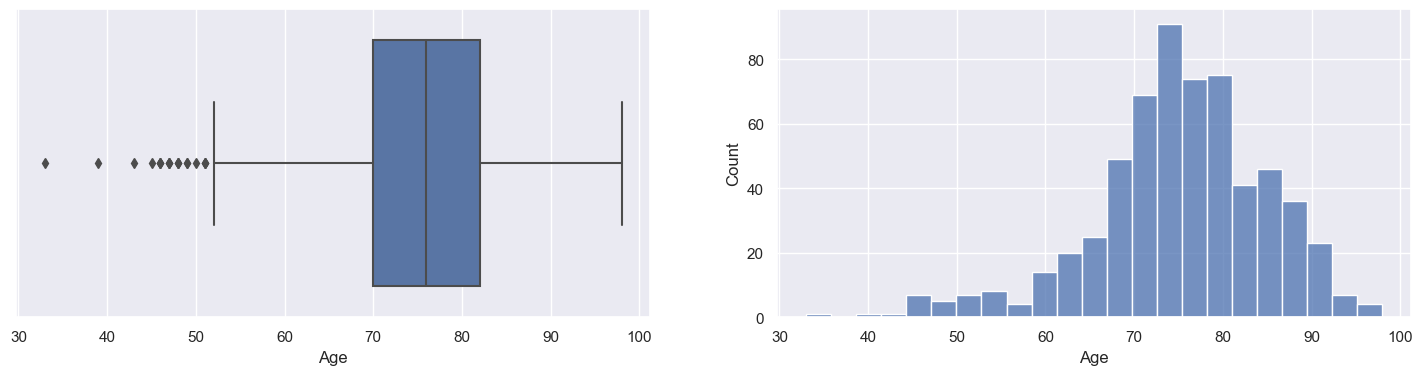

In [16]:
#ITSCHLOECHLOE
#Age
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = numericData['Age'], orient = "h", ax = axes[0])
sb.histplot(x = numericData['Age'], ax = axes[1])

### need to change education
1: less than high school grad., 2:
high school grad., 3: some college, 4: college grad., 5: beyond college. 
1: 0-17
2: 18
3: 19 
4: 20-21
5: >22


<Axes: xlabel='Educ', ylabel='Count'>

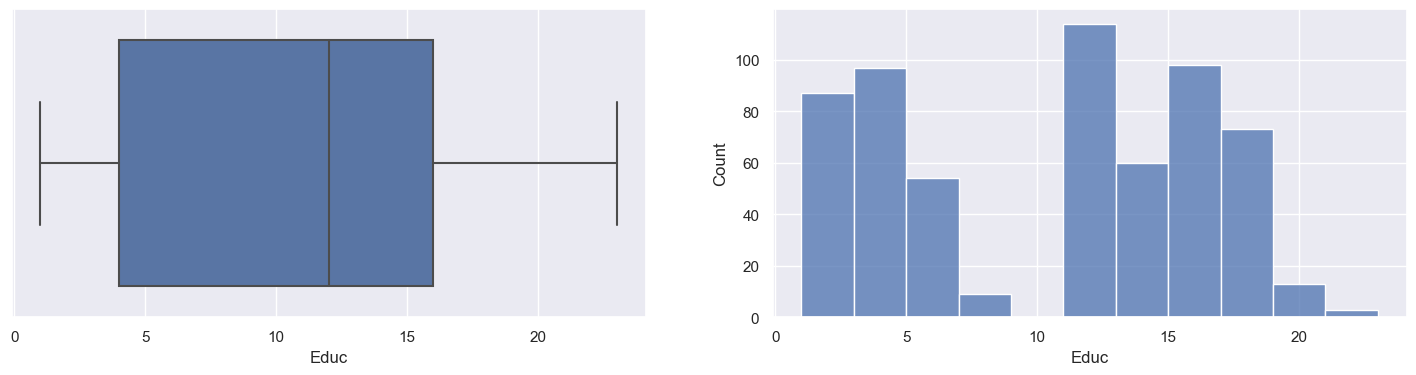

In [17]:
#Education 
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = alzheimersdata['Educ'], orient = "h", ax = axes[0])
sb.histplot(x = alzheimersdata['Educ'], ax = axes[1])

/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


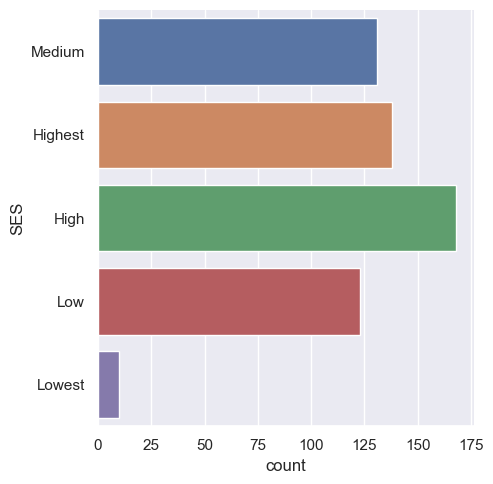

In [18]:
#SES
sb.catplot(y = 'SES', data = catData, kind = "count")

/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


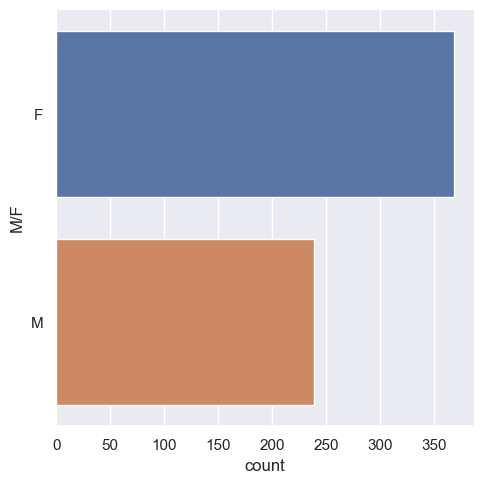

In [19]:
#Gender
sb.catplot(y = 'M/F', data = catData, kind = "count")

## Predictors Corresponding to Derived Anatomic Volumes

<Axes: xlabel='eTIV', ylabel='Count'>

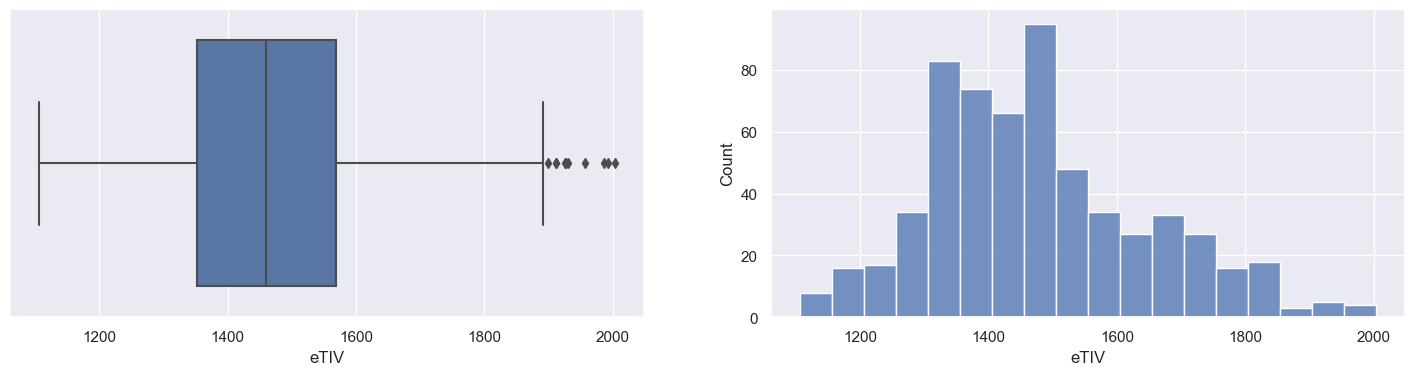

In [20]:
#ITSCHLOECHLOE
#eTIV
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = numericData['eTIV'], orient = "h", ax = axes[0])
sb.histplot(x = numericData['eTIV'], ax = axes[1])

<Axes: xlabel='nWBV', ylabel='Count'>

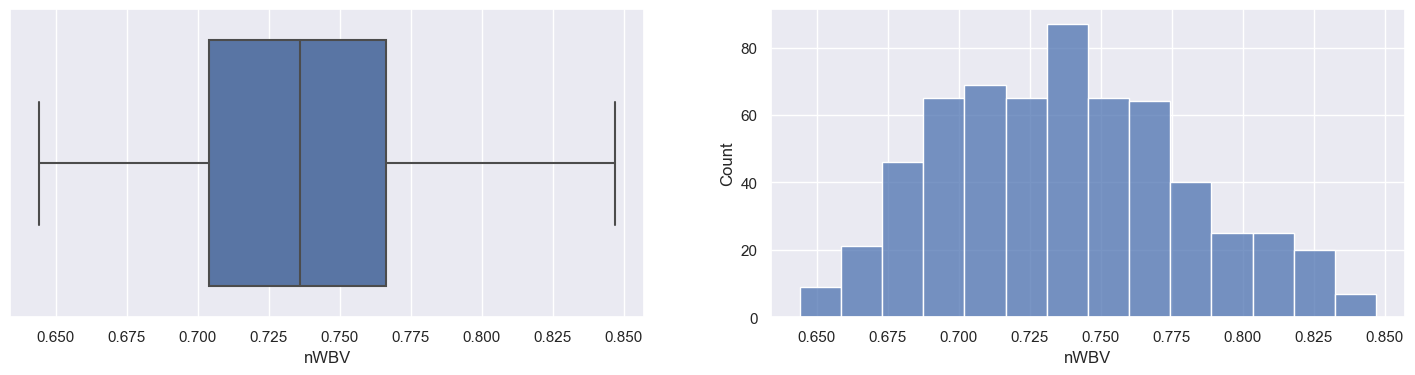

In [21]:
#nWBV
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = numericData['nWBV'], orient = "h", ax = axes[0])
sb.histplot(x = numericData['nWBV'], ax = axes[1])

<Axes: xlabel='ASF', ylabel='Count'>

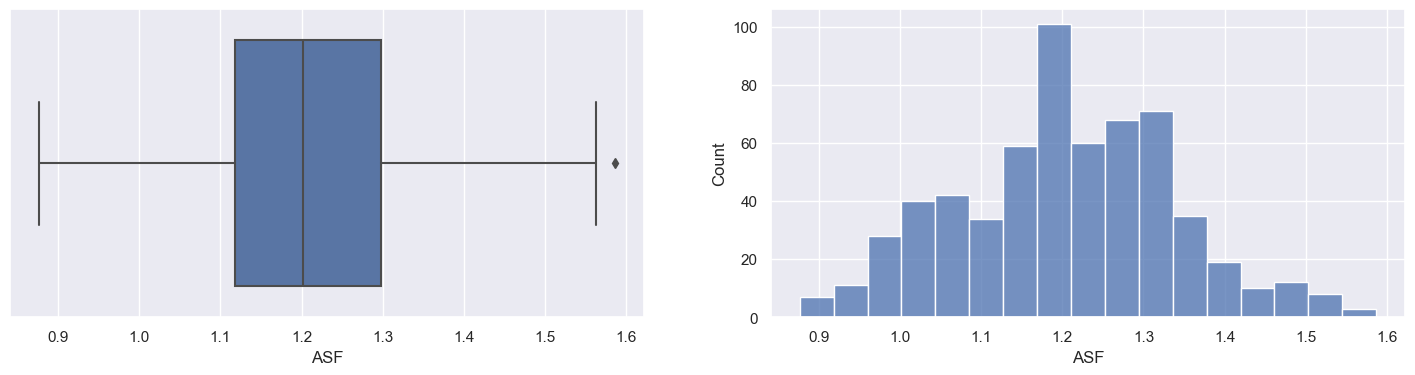

In [22]:
#ASF
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = numericData['ASF'], orient = "h", ax = axes[0])
sb.histplot(x = numericData['ASF'], ax = axes[1])

# Relationship with Response Variables (Clinical Info)

let's find out what causes high or low CDR. Is it due to demographics or does the CDR depend on the derived anatomic volumes? Check mutual relationships to find out potential effect of predictors on CDR.

<Axes: xlabel='Age', ylabel='CDR'>

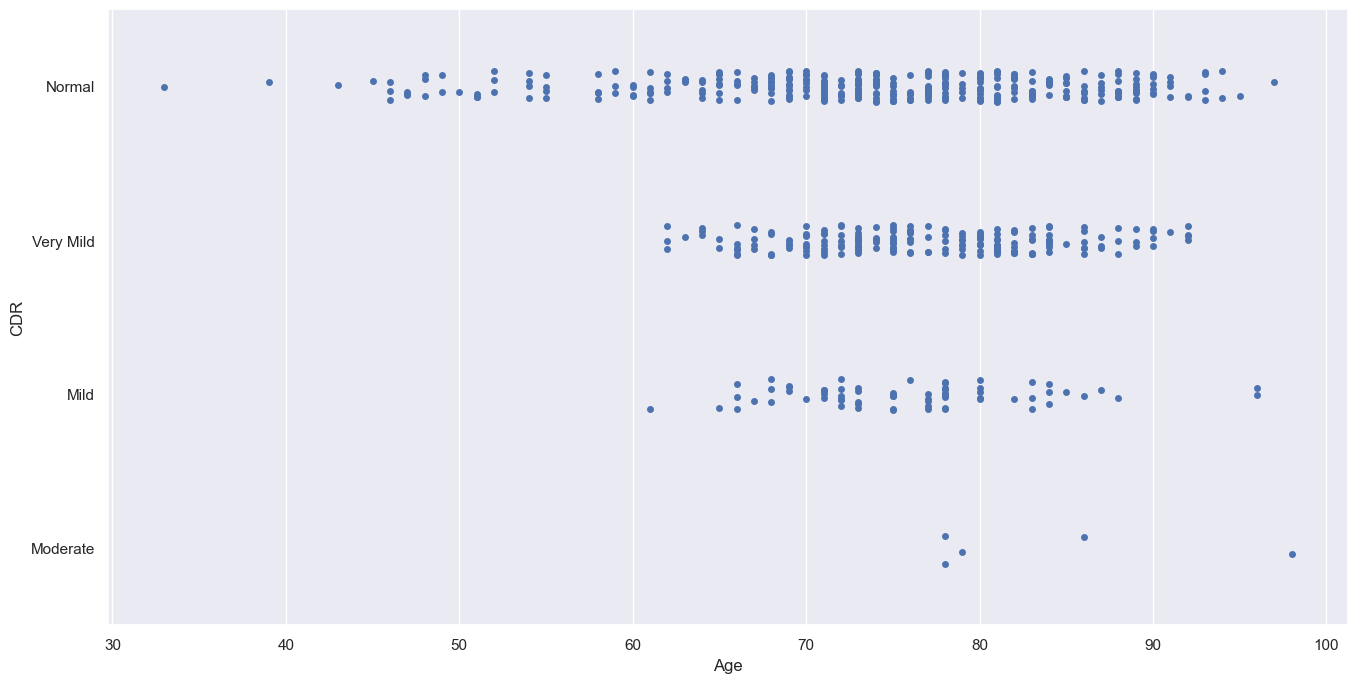

In [23]:
##ITSCHLOECHLOE
# CDR vs Age
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Age', y = 'CDR', data = alzheimersdata)

In [24]:
countNormal, countVeryMild, countMild, countModerate = alzheimersdata['CDR'].value_counts()
print("Ratio of classes is Normal : Very Mild: Mild: Moderate = ", countNormal, ":", countVeryMild, ":", countMild, ":", countModerate)

Ratio of classes is Normal : Very Mild: Mild: Moderate =  341 : 193 : 69 : 5


#### change education

<Axes: xlabel='Educ', ylabel='CDR'>

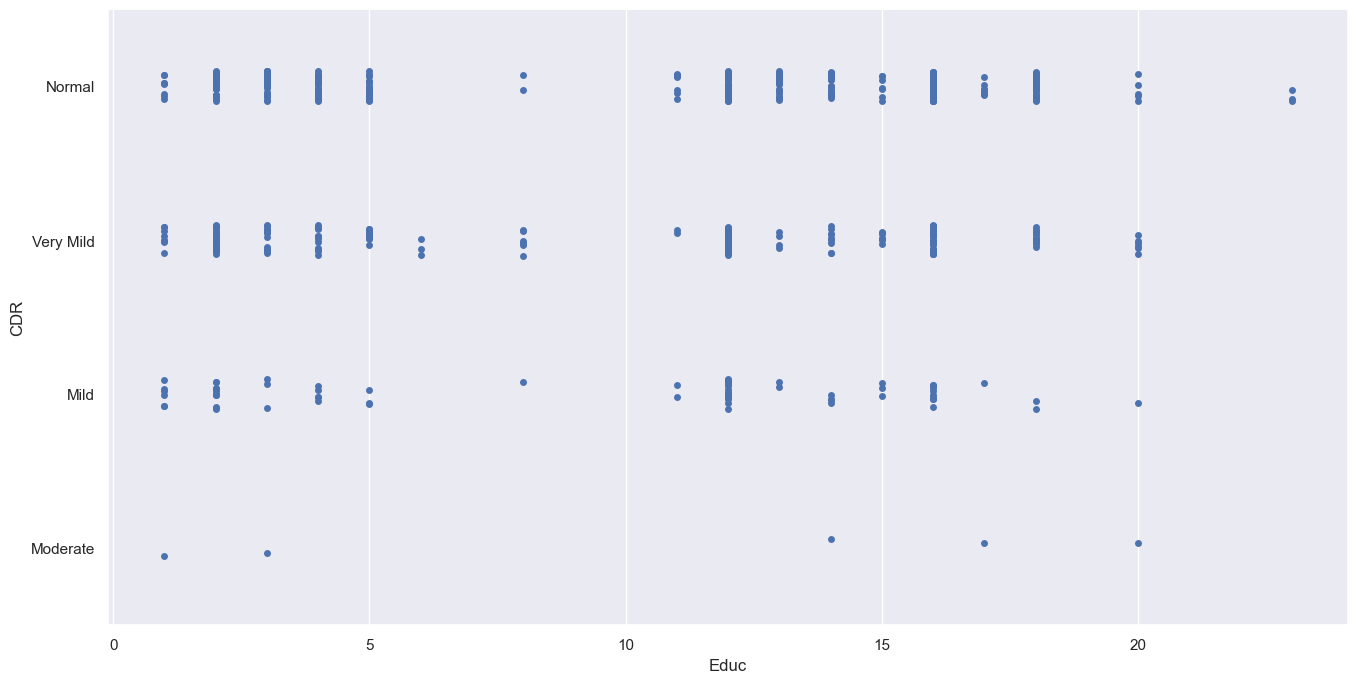

In [25]:
# CDR vs Education
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Educ', y = 'CDR', data = alzheimersdata)

<Axes: xlabel='SES', ylabel='CDR'>

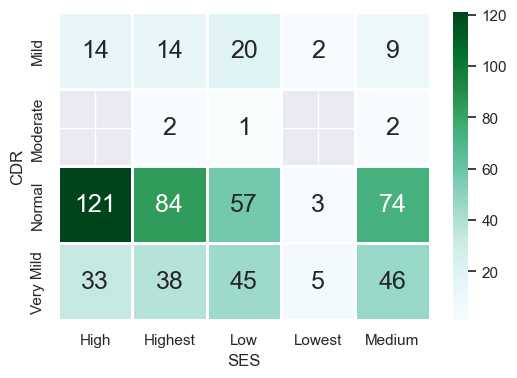

In [26]:
# CDR vs SES
f = plt.figure(figsize=(6, 4))
sb.heatmap(alzheimersdata.groupby(['CDR', 'SES']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='M/F', ylabel='CDR'>

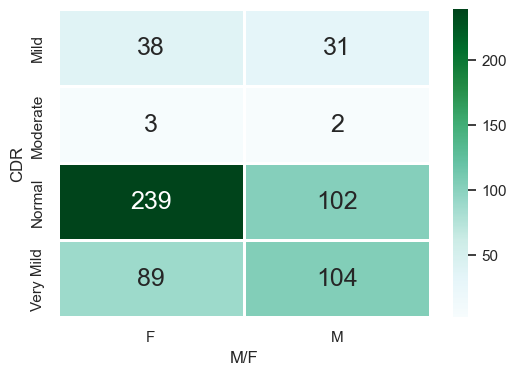

In [27]:
# CDR vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(alzheimersdata.groupby(['CDR', 'M/F']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<Axes: xlabel='eTIV', ylabel='CDR'>

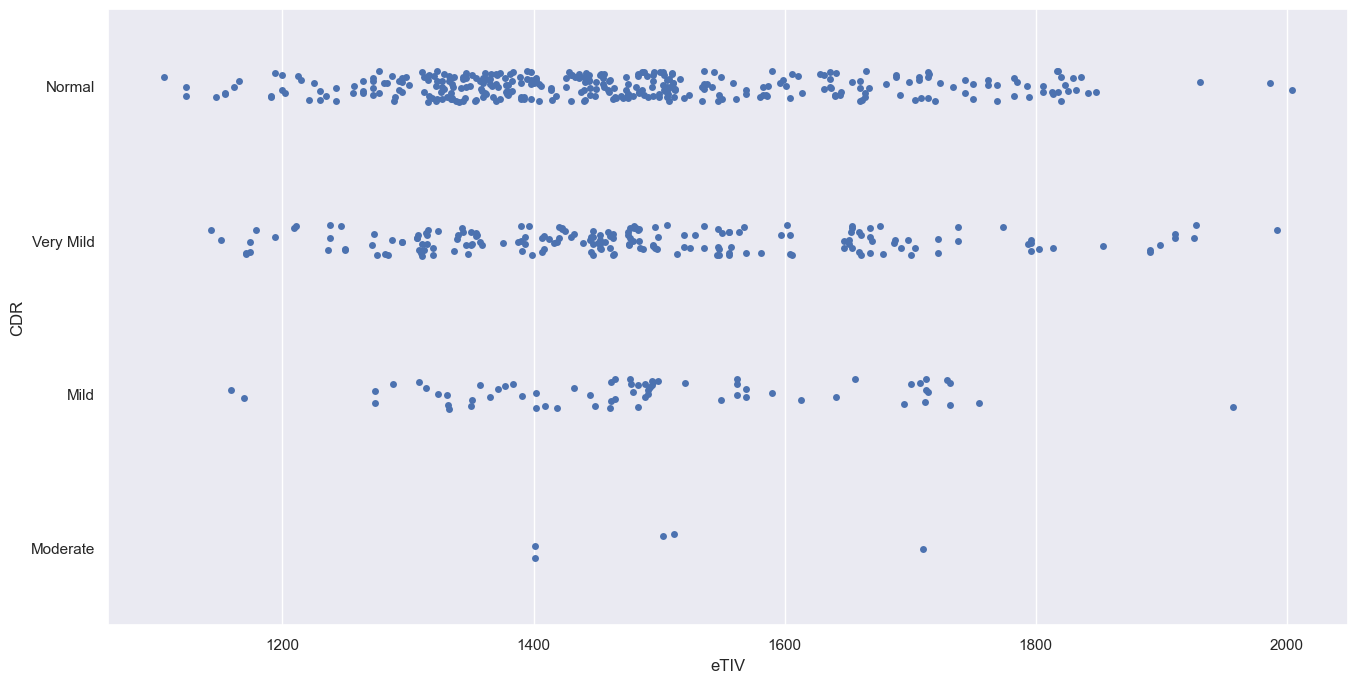

In [28]:
# CDR vs eTIV
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'eTIV', y = 'CDR', data = alzheimersdata)

<Axes: xlabel='nWBV', ylabel='CDR'>

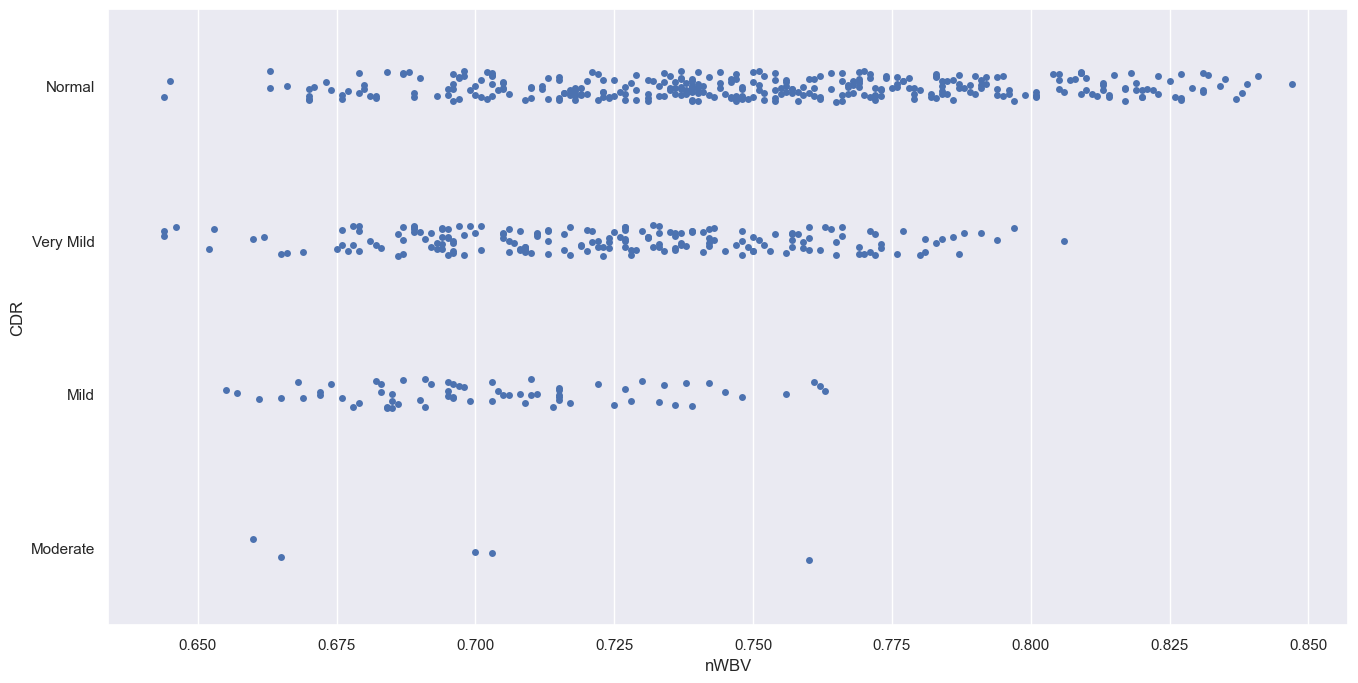

In [29]:
# CDR vs nWBV
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'nWBV', y = 'CDR', data = alzheimersdata)

<Axes: xlabel='ASF', ylabel='CDR'>

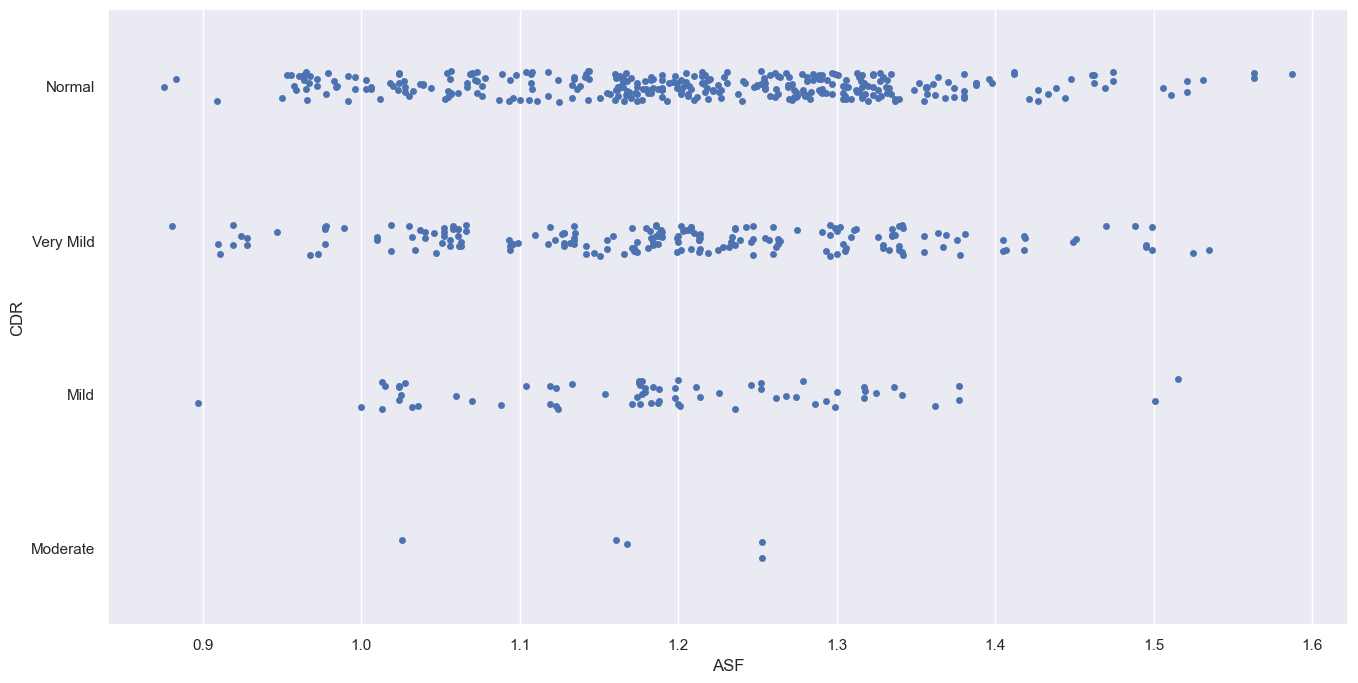

In [30]:
# CDR vs ASF
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'ASF', y = 'CDR', data = alzheimersdata)